In [144]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [145]:
data = pd.read_excel(r"Rent.xlsx")
data.head()

,area,rent
0,2000.0,31500.0
1,2100.0,35000.0
2,2500.0,41050.0
3,2250.0,36100.0
4,3000.0,52100.0


# EDA

In [146]:
#Cheak for missing values
data.isnull().sum()

area    0
rent    0
dtype: int64

In [147]:
#check for duplicates
data.duplicated().sum()
data.drop_duplicates()

,area,rent
0,2000.0,31500.0
1,2100.0,35000.0
2,2500.0,41050.0
3,2250.0,36100.0
4,3000.0,52100.0
5,1900.0,32500.0
6,1500.0,20000.0
7,1850.0,24500.0
8,2700.0,48000.0
9,2100.0,31000.0


In [148]:
data.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


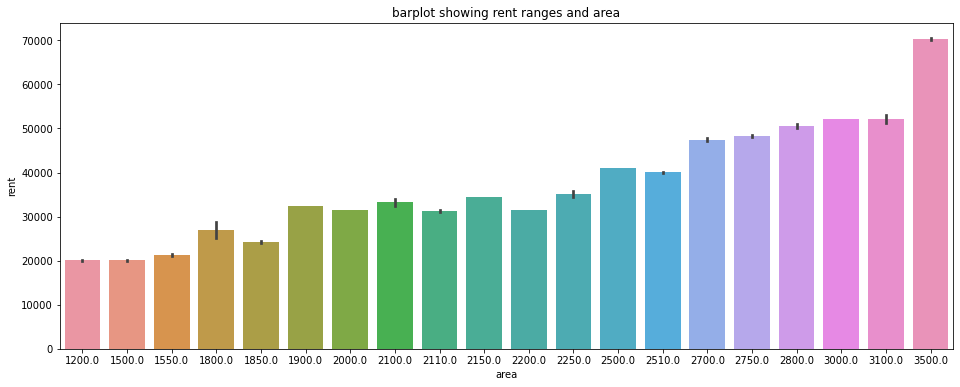

In [149]:
plt.figure(figsize=(16,6))
plt.title("barplot showing rent ranges and area")
plt.xlabel("Area")
plt.ylabel("Rent")
sns.barplot(x="area",y="rent",data=data)
plt.show()

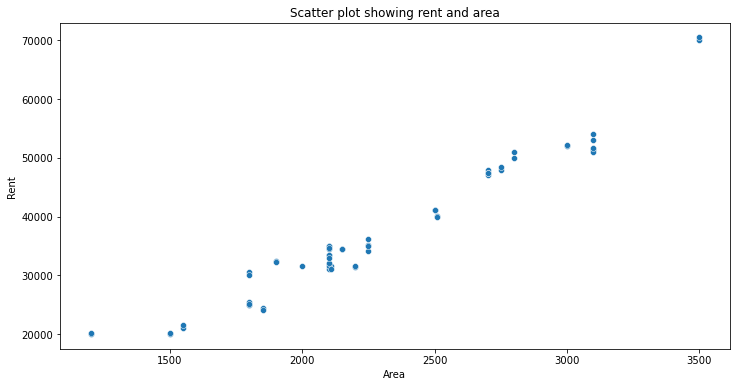

In [150]:
plt.figure(figsize=(12,6))
plt.title("Scatter plot showing rent and area")
plt.xlabel("Area")
plt.ylabel("Rent")
sns.scatterplot(x="area",y="rent",data=data)
plt.show()

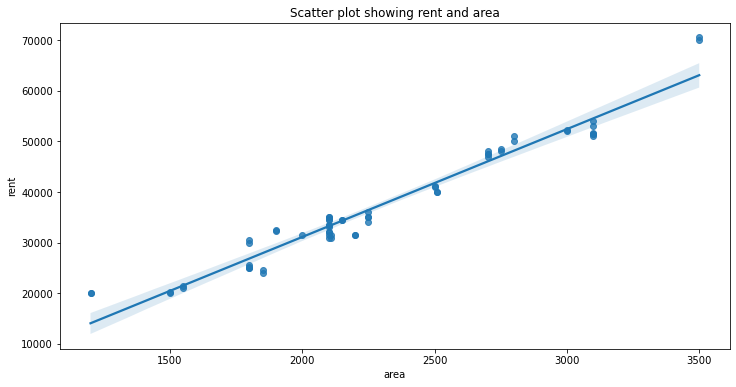

In [151]:
plt.figure(figsize=(12,6))
plt.title("Scatter plot showing rent and area")
plt.xlabel("Area")
plt.ylabel("Rent")
sns.regplot(x="area",y="rent",data=data)
plt.show()

# Correlation

In [152]:
corr_matrix = data.corr()

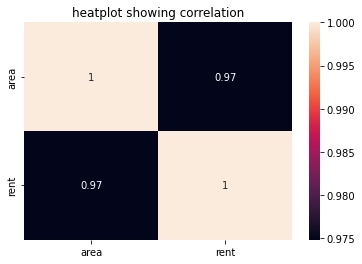

In [153]:
plt.title("heatplot showing correlation")
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Model building

In [154]:
model = LinearRegression()

In [155]:
x = data[["area"]]
y = data["rent"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [156]:
model.fit(x_train,y_train)
print(f'Slope of our model is : {model.coef_}')
print(f'Intercept of our model is : {model.intercept_}')

Slope of our model is : [21.7394329]
Intercept of our model is : -12410.640247775584


In [157]:
#if we check our model for an area
pred = model.predict([[3000]])
pred

array([52807.65844206])

In [158]:
predictions = model.predict(x_test)
predictions

array([41937.94199375, 33242.16883511, 26720.33896613, 54981.60173172,
       33242.16883511, 33242.16883511, 21285.48074197, 33242.16883511,
       31068.22554545, 13676.67922816, 33242.16883511, 48459.77186274,
       52807.65844206, 47372.80021791, 42155.33632272, 33242.16883511,
       27807.31061096, 34329.14047994])

In [159]:
y_test

32    41100.0
51    33000.0
48    25500.0
45    51000.0
12    34500.0
42    34700.0
17    21000.0
30    33500.0
0     31500.0
53    20100.0
9     31000.0
24    50000.0
34    52200.0
26    48000.0
13    40050.0
39    31500.0
37    24000.0
10    34500.0
Name: rent, dtype: float64

In [160]:
x_test

,area
32,2500.0
51,2100.0
48,1800.0
45,3100.0
12,2100.0
42,2100.0
17,1550.0
30,2100.0
0,2000.0
53,1200.0


In [161]:
x_train

,area
16,1800.0
25,3100.0
57,1800.0
11,2100.0
28,2200.0
56,2750.0
21,2100.0
36,1500.0
14,2250.0
5,1900.0


In [162]:
y_train

16    30500.0
25    53000.0
57    25100.0
11    32000.0
28    31460.0
56    48500.0
21    33500.0
36    20200.0
14    34100.0
5     32500.0
33    35100.0
43    40000.0
46    30000.0
4     52100.0
1     35000.0
18    25000.0
49    47500.0
19    47000.0
22    70000.0
40    34400.0
20    31500.0
38    47500.0
58    31560.0
7     24500.0
23    20000.0
47    21500.0
41    32020.0
29    51400.0
6     20000.0
8     48000.0
50    31000.0
55    54000.0
2     41050.0
15    51500.0
35    32300.0
31    35010.0
27    25000.0
44    35000.0
52    70500.0
3     36100.0
54    51000.0
59    51600.0
Name: rent, dtype: float64

# Checking errors

In [163]:
mean_error = mean_absolute_error(y_test,predictions)
mean_error

1624.391748617783

In [164]:
mean_sq_error=mean_squared_error(y_test,predictions)
mean_sq_error

5197705.032904955

# performance of our model 

In [165]:
model.score(x_test,y_test)

0.9443868494608832

In [166]:
model.score(x_train,y_train)

0.9504928685423878

So that the train accuracy is greater than the test accuracy

# Random data checking

In [167]:
rand_x = data.iloc[np.random.randint(0,data.shape[0])]
rand_y = rand_x["rent"]
rand_x = rand_x.drop(["rent"])

In [168]:
print(f'The Actual value of rent is :{rand_y}')
print(f'The predicted value of rent by our model is :{model.predict([rand_x])}')

The Actual value of rent is :51000.0
The predicted value of rent by our model is :[54981.60173172]


# Difference between Actual and Predicted

<AxesSubplot:title={'center':'Scatterplot showing actual values and LinePlots showing predicted values'}, xlabel='Area', ylabel='Rent'>

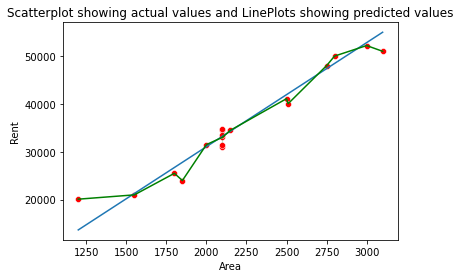

In [169]:
xtest = np.array(x_test)
xtest = xtest.reshape(18,)
plt.title("Scatterplot showing actual values and LinePlots showing predicted values")
plt.xlabel("Area")
plt.ylabel("Rent")
sns.scatterplot(x=xtest,y=y_test,color="r")
sns.lineplot(x=xtest,y=predictions)
sns.lineplot(x=xtest,y=y_test,color="g")

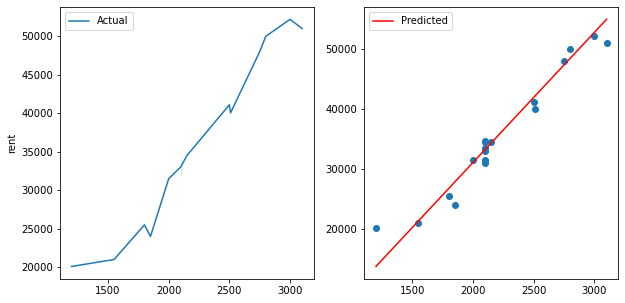

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sttrplot=plt.scatter(x=xtest, y=y_test)
# Plot a barplot on each subplot
sns.lineplot(x=xtest, y=y_test, ax=axes[0],label='Actual')
sns.lineplot(x=xtest, y=predictions, ax=axes[1], label="Predicted",color='r')

# Show the plot
plt.show()

In [171]:
data1 = pd.DataFrame({"Actual": y_test,"predicted":predictions}).sort_index(ascending=True)
data1

,Actual,predicted
0,31500.0,31068.225545
9,31000.0,33242.168835
10,34500.0,34329.140480
12,34500.0,33242.168835
13,40050.0,42155.336323
17,21000.0,21285.480742
24,50000.0,48459.771863
26,48000.0,47372.800218
30,33500.0,33242.168835
32,41100.0,41937.941994


In [172]:
graph = data1.head(20)

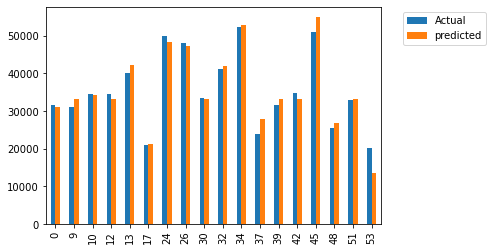

In [173]:
graph.plot(kind="bar")
plt.legend(bbox_to_anchor=(1.05,1))

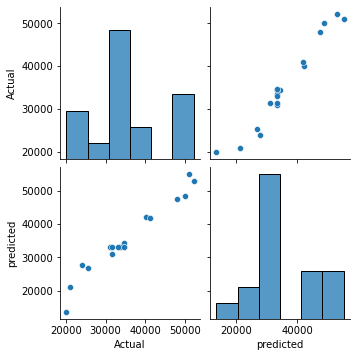

In [174]:
sns.pairplot(data1)

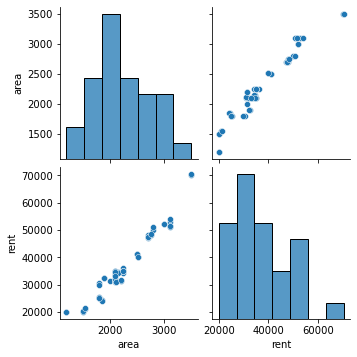

In [175]:
sns.pairplot(data)